This is a basic notebook that demonstrates how to play with .ldf files in a notebook.

In [1]:
# All the imports, etc.... this would be a good one to fold up, if I knew how...

%load_ext autoreload
%autoreload 2

from base64 import b64encode
import copy
from datetime import datetime
import getopt
import logging
import os
import sys

# standard numeric/scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sps
import scipy.fftpack as fftpack 

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

try:
    # I use dark mode in my notebooks, this makes the plots match :)
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)    
except:
    pass

# image display
from PIL import Image
import IPython.display 
from IPython.display import HTML

# Add lddecode core modules to path
module_path = os.path.abspath(os.path.join('../lddecode'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)
    
from lddecode.utils import *
from lddecode.utils_logging import *
from lddecode.utils_plotting import *
import lddecode.core as core

In [2]:
# This needs to be done after the first block for some reason?
matplotlib.rc('figure', figsize=(20, 12))

In [3]:
logger = init_logging(None)

In [8]:
# Would move this to uitls, but needs to run core.LDdecode

def rundecode(filename, outname, firstframe, numframes, system='NTSC', extra_options = {}):
    """ Helper function for notebooks, returns main ldd object and all fields """
    loader = make_loader(filename)

    ldd = core.LDdecode(filename, outname, loader, _logger = logger, system=system)
    ldd.roughseek(firstframe * 2)
    ldd.blackIRE = 7.5

    fields = []
    for i in range(0, numframes * 2):
        fields.append(ldd.readfield())

    write_json(ldd, ldd.build_json(), outname)
    
    return ldd, fields

In [9]:
filename = '/home/cpage/ld-decode/testdata//he010_cbar.lds'
outname = 'devbook'
system = 'NTSC'

ldd, fields = rundecode(filename, outname, 0, 3, system)

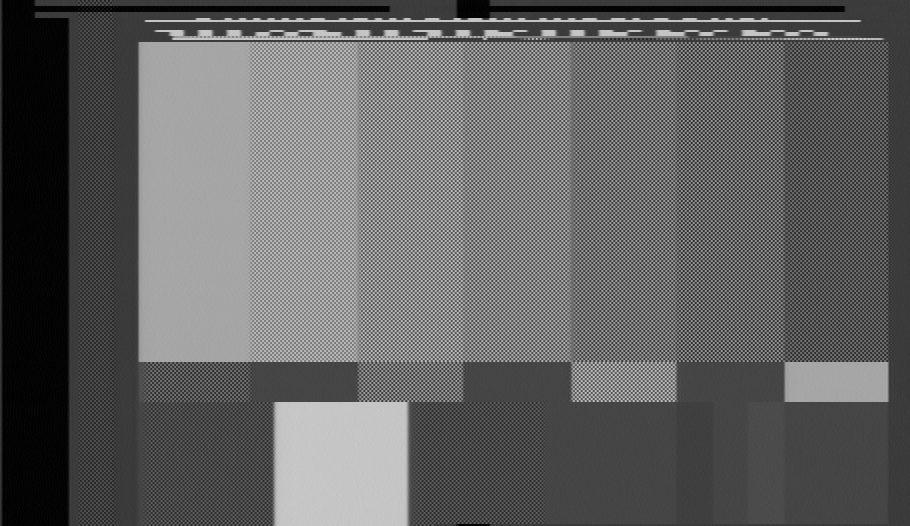

In [9]:
# Displays field
draw_field(fields[0])

In [16]:
f = fields[0]

In [12]:
# Now run ld-chroma-decoder on the above output, which allows us to display lines and the decoded picture
rgb = RGBoutput(outname)

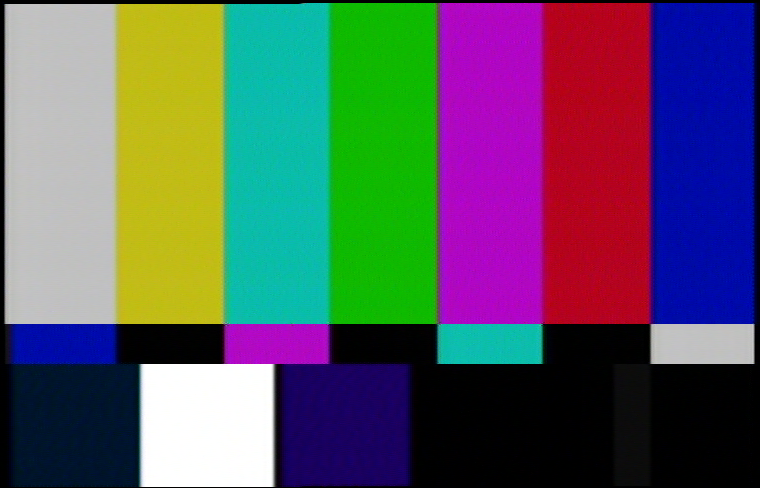

In [13]:
rgb.display(0)

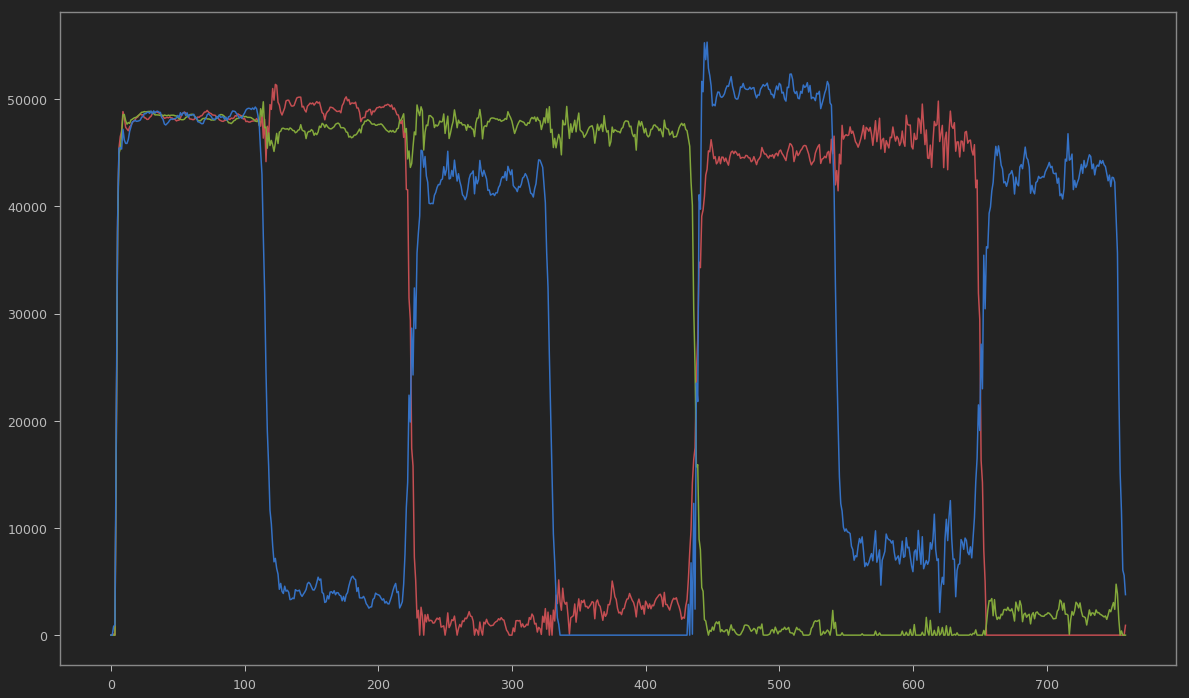

In [12]:
#matplotlib.rc('figure', figsize=(20, 12))
rgb.plotline(0, 240)